# packages 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

# Data

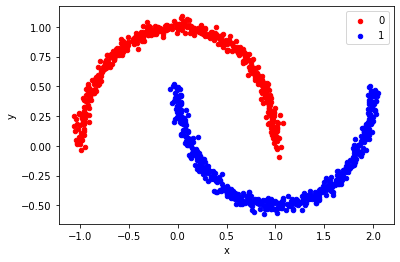

In [30]:
# generate 2d classification dataset
X, y= make_moons(n_samples=1000, noise=0.03)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# Implementation of DBSCAN

In [109]:
class DBSCAN:
    def __init__(self,k,eps,minpts,random_state=42):
        self.eps=eps
        self.minpts=minpts
        self.random_state=random_state
    
    def get_no_neighbours(x,point):
        no_neighbours=0
        #TODO
        
        return no_neighbours
    
    
    def mark_the cluster(x,point,cluster_no):
        #TODO
        return
    
    
    def check_neighbours(x,points,cluster_no):
        #TODO
        return
    
        
    
    def fit(self,x):
        cluster_no=0
        self.idx=np.zeros(x.shape[0])
        # -1 -> noise , 0 -> not visited
        # 1 -> core point , 2 -> border point
        #get a random point
        while np.where(self.idx==0)[0].size !=0:
            np.random.RandomState(self.random_state)
            random_idx = np.random.randint(X.shape[0],size=1)
            random_point=x[random_idx[0],:]
            # check if it's not visited
            if self.idx[random_idx[0]]==0:
                if get_no_neighbours(x,random_point)<self.minpts:
                    #mark as noise
                    self.idx[random_idx[0]]=-1
                    
                else:
                    #start a cluster
                    cluster_no+=1
                    #mark point and its neighbours
                    mark_the cluster(x,random_idx[0],cluster_no)
                    #check all the points recursively
                    points_idx=np.where(self.isx==cluster_no)
                    points_idx=np.delete(points_idx,random_idx[0])
                    check_neighbours(x,points_idx,cluster_no)
                
                  

In [110]:
model=DBSCAN(eps=0.3,minpts=9)

In [111]:
model.fit(df)
yhat = model.predict(df)
clusters = np.unique(yhat)

In [ ]:
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

In [75]:
arr=np.array([1,2,0,3])
np.where(arr==0)[0].size

1

# DBSCAN in sklearn

In [39]:
# define the model
model = DBSCAN(eps=0.3, min_samples=9)

In [40]:
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)

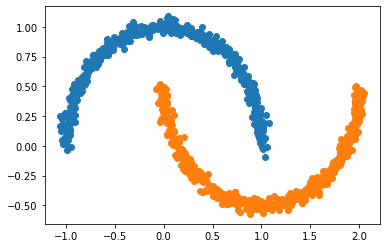

In [42]:
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()